# Global Terrorism Data Analysis


Ryerson University                                                                          

Student: Emil Ibrahim  

Course: CKM136XJ0 Capstone

Student Id: 500862456

Supervisor: Dr.Can Kavaklioglu


# Import Modules

In [1]:
print ("Importing Moduels...")

import warnings
warnings.filterwarnings('ignore')

# For calculations and data 
import numpy as np
import pandas as pd

# For plooting and graphes
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats
import matplotlib.patches as mpatches

# For Data preprocessing
from sklearn.preprocessing import LabelEncoder

# For Experimental Desgin
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import itertools

# For Modeling
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

# For Validation
from sklearn.dummy import DummyClassifier

#For NLP 
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

print(" ")
print ("All modules imported successfully" )


Importing Moduels...
 
All modules imported successfully


In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Load dataset

In [18]:
# Read the dataframe
mydata = pd.read_csv('../code/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [19]:
mydata.shape

(181691, 135)

In [4]:
mydata.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'summary', 'crit1', 'crit2',
       ...
       'nreleased', 'addnotes', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
       'scite1', 'scite2', 'scite3', 'dbsource'],
      dtype='object', length=135)

In [8]:
#mydata.summary

In [37]:
mydata.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,summary,crit1,crit2,...,nreleased,addnotes,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS
4,1.970010e+11,1970,1,0,NaN,0,NaN,NaN,1,1,...,NaN,NaN,-9,-9,1,1,NaN,NaN,NaN,PGIS


# Initial Analysis

## Univariate Analysis 



(detailed data dictionary / list all vaibles and understand what each varible mean and represent)(what is the source of each varible directly measured or calculated based on other varibles or does the vaible has a time domain assoicated) - (Decide on the dependent (target) varibale) (Assigning the corrcet data types and appropriate column names)(for numeric attributes check the 5 number summary min 1sQ mean 3rdQ max  )(for categrical attributes check and decide on the levels , frequency) (check and deal with data inconsistencies , missing values , erros , duplicates , outliers (boxplots) , numeric signs , upper and lower cases , spaces or spcial charachters in strigs) (check distributions of the varibales : Norml distirbution?)(Low variance filter)(check the imbalance in the dependent varbalie) (check time varbiles) (Univariate visulaizations)



In [38]:
mydata.describe()

,eventid,iyear,imonth,iday,extended,crit1,crit2,crit3,doubtterr,alternative,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,0.988530,0.993093,0.875668,-0.523171,1.292923,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,0.106483,0.082823,0.329961,2.455819,0.703729,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
mydata['iyear'].describe()

count    181691.000000
mean       2002.638997
std          13.259430
min        1970.000000
25%        1991.000000
50%        2009.000000
75%        2014.000000
max        2017.000000
Name: iyear, dtype: float64

In [40]:
mydata['success'].describe()

count    181691.000000
mean          0.889598
std           0.313391
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

In [41]:
mydata['country_txt'].describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: country_txt, dtype: object

In [95]:
#list the levels
mydata['country_txt'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece',
       'United States', 'Uruguay', 'East Germany (GDR)', 'Guatemala',
       'Venezuela', 'West Germany (FRG)', 'Switzerland', 'Italy', 'Spain',
       'Brazil', 'Ethiopia', 'Egypt', 'Argentina', 'Lebanon', 'Japan',
       'Ireland', 'Jordan', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Bolivia', 'Nicaragua', 'Belgium', 'Netherlands',
       'Canada', 'Australia', 'Pakistan', 'Zambia', 'Sweden',
       'South Yemen', 'Cambodia', 'Israel', 'Poland', 'Taiwan', 'Panama',
       'Kuwait', 'Austria', 'Czechoslovakia', 'India', 'France',
       'South Vietnam', 'Colombia', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Cyprus', 'Myanmar',
       'Afghanistan', 'Morocco', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'Malaysia', 'Singapore', 'Jamaica',
       'Chad', 'North Yemen', 'Andorra', 'Syria', 'South Korea',

In [108]:
# Frequency
mydata['country_txt'].value_counts()

Iraq                              21695
Pakistan                          11755
Afghanistan                       10751
India                              9860
Colombia                           6046
Peru                               5162
Philippines                        5043
United Kingdom                     3980
Nigeria                            3507
Thailand                           3178
El Salvador                        3056
Turkey                             2822
Spain                              2772
Somalia                            2622
Yemen                              2314
United States                      2275
France                             2113
Sri Lanka                          2018
Chile                              1902
Egypt                              1881
Algeria                            1834
Russia                             1784
Libya                              1749
Syria                              1647
Israel                             1564


In [109]:
#mydata.groupby('country_txt').count()

{'whiskers': [<matplotlib.lines.Line2D at 0x19b0001ceb8>,
 'caps': [<matplotlib.lines.Line2D at 0x19b00028588>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b0001cd68>],
 'medians': [<matplotlib.lines.Line2D at 0x19b00028c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b00028f60>],
 'means': []}

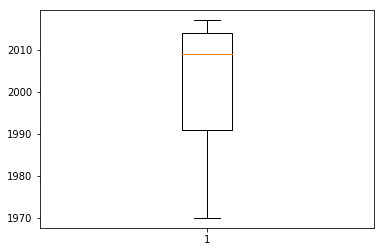

In [42]:
plt.boxplot(mydata['iyear'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19b0005f358>,
 'caps': [<matplotlib.lines.Line2D at 0x19b0005f9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b0005f208>],
 'medians': [<matplotlib.lines.Line2D at 0x19b0008f0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b0008f400>],
 'means': []}

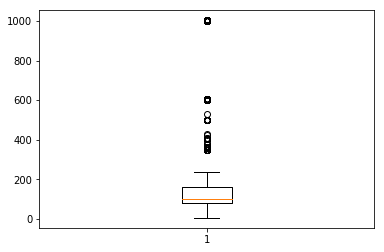

In [43]:
plt.boxplot(mydata['country'])

In [20]:
#mydata1 = mydata[(mydata.crit1 == 1) & (mydata.crit2 == 1) & (mydata.crit3 == 1) & (mydata.doubtterr == 0)]

In [21]:
#mydata1.shape

In [56]:
#mydata2 = mydata.loc[1:2,:]

In [ ]:
#mydata2

Text(0, 0.5, 'number')

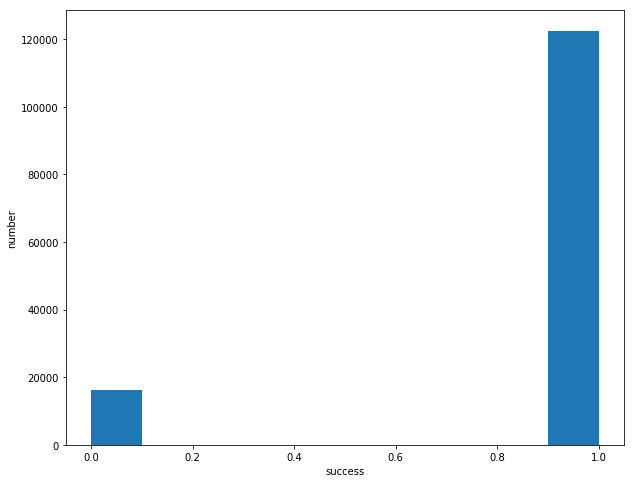

In [48]:
#Histogram 
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
mydata1['success'].plot.hist(ax=ax)
ax.set_xlabel('success')
ax.set_ylabel('number')


Text(0, 0.5, 'number')

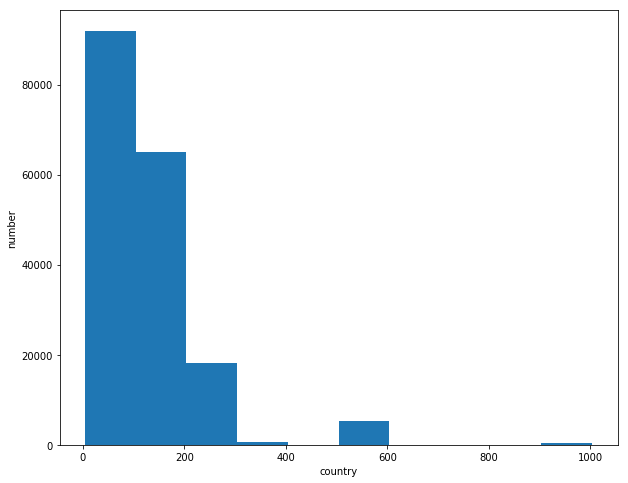

In [49]:
#Histogram 
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
mydata['country'].plot.hist(ax=ax)
ax.set_xlabel('country')
ax.set_ylabel('number')

Text(0, 0.5, 'number incedent')

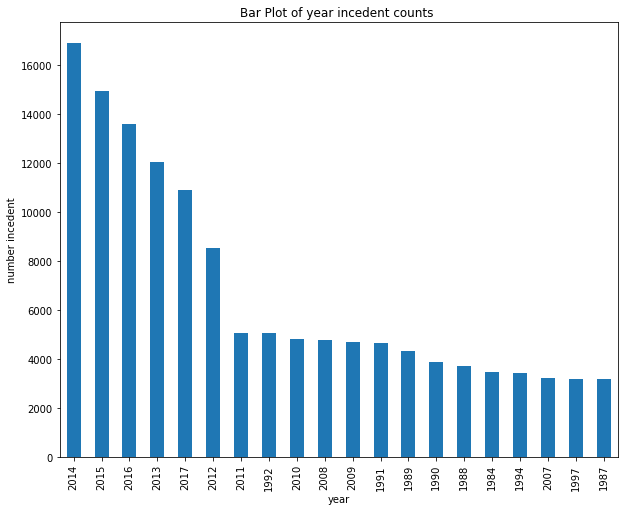

In [50]:
#Bar plot (for discrte/ categoral  data)
counts = mydata['iyear'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of year incedent counts ')
ax.set_xlabel('year')
ax.set_ylabel('number incedent')

Text(0, 0.5, 'number incedent')

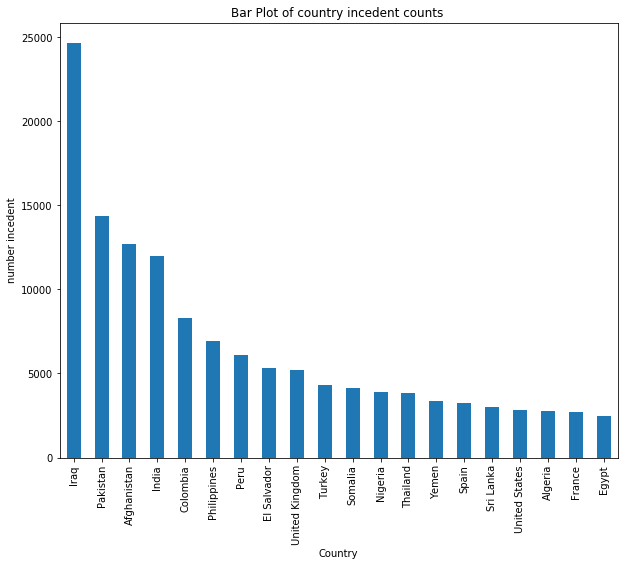

In [51]:
#Bar plot
counts = mydata['country_txt'].value_counts()
fig = plt.figure(figsize=(10,8))
ax =fig.gca()
counts[0:20].plot.bar(ax = ax)
ax.set_title('Bar Plot of country incedent counts ')
ax.set_xlabel('Country')
ax.set_ylabel('number incedent')

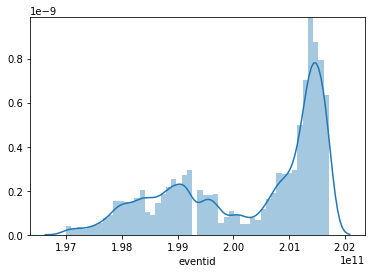

In [52]:
sns.distplot(mydata['eventid'])

In [53]:
counts = mydata['country_txt'].value_counts()
counts

Iraq                              24636
Pakistan                          14368
Afghanistan                       12731
India                             11960
Colombia                           8306
Philippines                        6908
Peru                               6096
El Salvador                        5320
United Kingdom                     5235
Turkey                             4292
Somalia                            4142
Nigeria                            3907
Thailand                           3849
Yemen                              3347
Spain                              3249
Sri Lanka                          3022
United States                      2836
Algeria                            2743
France                             2693
Egypt                              2479
Lebanon                            2478
Chile                              2365
Libya                              2249
West Bank and Gaza Strip           2227
Syria                              2201


In [54]:
print("Skewness: %f" % mydata['eventid'].skew())
print("Kurtosis: %f" % mydata['eventid'].kurt())

Skewness: -0.619156
Kurtosis: -1.042982


Cleaning Data

Based on the codebook and detailed data dictionary for the dataset (files can be found on the documents folder): (crit1, crit2, crit3 , doubtterr) record which of the inclusion criteria are met. to filter out those incidents whose inclusion was based on a criterion which they believe does constitute terrorism proper.

Criterion 1: POLITICAL, ECONOMIC, RELIGIOUS, OR SOCIAL GOAL (CRIT1) = 1 

Criterion 2: INTENTION TO COERCE, INTIMIDATE OR PUBLICIZE TO LARGER AUDIENCE(S) (CRIT2) =1

Criterion 3: OUTSIDE INTERNATIONAL HUMANITARIAN LAW (CRIT3) =1

Doubt Terrorism Proper? (doubtterr) =0


In [23]:
mydata = mydata[(mydata.crit1 == 1) & (mydata.crit2 == 1) & (mydata.crit3 == 1) & (mydata.doubtterr == 0)]

In [24]:
mydata.shape

(138879, 135)

Dealing with null values

In [5]:
#mydata.isnull().sum()

In [25]:
mydata.shape[0]

138879

In [26]:
#Null value 
#100*mydata.isnull().sum()/mydata.shape[0]

In [27]:
# find Null value , calculate % of missing value from total , sort de-ascending
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

alternative_txt     99.995680
alternative         99.995680
gsubname3           99.993520
weapsubtype4_txt    99.960397
weapsubtype4        99.960397
weaptype4_txt       99.957517
weaptype4           99.957517
claimmode3          99.922955
claimmode3_txt      99.922955
gsubname2           99.902793
divert              99.855270
guncertain3         99.819987
claim3              99.819987
gname3              99.817107
attacktype3_txt     99.715580
attacktype3         99.715580
ransomnote          99.671657
claimmode2_txt      99.647175
claimmode2          99.647175
ransompaidus        99.645735
ransomamtus         99.637094
ransompaid          99.540607
corp3               99.354114
targsubtype3_txt    99.310191
targsubtype3        99.310191
ransomamt           99.296510
natlty3             99.286429
natlty3_txt         99.286429
targtype3           99.266988
targtype3_txt       99.266988
                      ...    
country              0.000000
iyear                0.000000
crit2     

In [28]:
#droping more than 75% Null values attributes
mylist = []
for i in mydata:
    if 100*mydata[i].isnull().sum()/mydata.shape[0] > 75:
        mylist.append(i)

In [31]:
#mydata.shape

In [32]:
#mydata.head()

In [61]:
#mydata.describe()

In [30]:
#Null value 
#list1 =100*mydata.isnull().sum()/mydata.shape[0]
#list1.sort_values(ascending=False)

In [33]:
len(mylist)

69

In [34]:
mylist

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'related',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'compclaim',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'propvalue',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',


In [35]:
mydata = mydata.drop(mylist,axis=1)

In [36]:
mydata.shape

(138879, 66)

In [37]:
#Null value 
list1 =100*mydata.isnull().sum()/mydata.shape[0]
list1.sort_values(ascending=False)

scite3              73.543876
motive              67.572491
location            65.518905
propcomment         63.870708
ransom              62.601977
propextent          61.688952
propextent_txt      61.688952
scite2              53.147704
weapdetail          38.421936
nperps              34.355086
nperpcap            32.311581
nwoundte            31.536805
nkillter            30.548895
scite1              30.329279
summary             30.286796
claimed             30.282476
nwoundus            29.631550
nkillus             29.496180
corp1               22.509523
weapsubtype1_txt     9.241858
weapsubtype1         9.241858
nwound               7.887442
targsubtype1         6.302609
targsubtype1_txt     6.302609
nkill                4.873307
longitude            2.073028
latitude             2.073028
natlty1_txt          0.953348
natlty1              0.953348
target1              0.326903
                      ...    
region_txt           0.000000
region               0.000000
country   

In [39]:
mydata.head()

,eventid,iyear,imonth,iday,extended,summary,crit1,crit2,crit3,doubtterr,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,0,NaN,1,1,1,0.0,...,0.0,0.0,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,0,NaN,1,1,1,0.0,...,1.0,1.0,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,0,NaN,1,1,1,0.0,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
5,1.970010e+11,1970,1,1,0,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,...,0.0,0.0,-9,-9,0,-9,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project


In [90]:
# set text to lower case
mydata.target1 = mydata.target1.str.lower()
mydata.gname = mydata.gname.str.lower()
mydata.summary = mydata.summary.str.lower()    

mydata.weapsubtype1 = mydata.weapsubtype1.str.lower()
mydata.natlty1 = mydata.natlty1.str.lower()

In [87]:
#fill null vaules 
mydata['weapsubtype1'].fillna('No Record', inplace=True)
mydata['natlty1'].fillna('unknown', inplace=True)
mydata['target1'].fillna('unknown', inplace=True)



In [88]:
#replaceve unk with unknown
mydata.target1 = mydata.target1.replace('unk','unknown')

In [91]:
# fill missing value for nkill and nwound with the median
mydata.nkill = np.round(mydata.nkill.fillna(mydata.nkill.median())).astype(int) 
mydata.nwound = np.round(mydata.nwound.fillna(mydata.nwound.median())).astype(int) 

## BiVariate Analysis 

(pairwise relations) (pairwise visuliazations like scatter plots) (correlation analysis spearman or pearson)

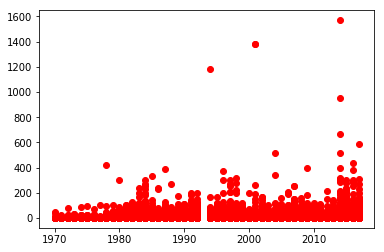

In [72]:
#scatter plot (ro = red dot) using matplot.lib
plt.plot(mydata['iyear'] , mydata['nkill'],'ro')

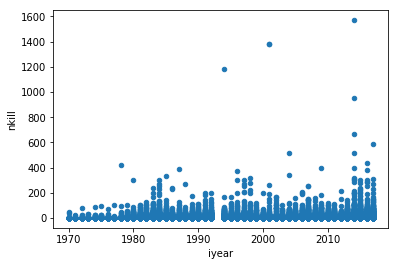

In [73]:
#scatter plot2 using pandas
mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill')

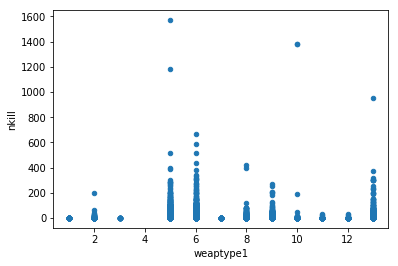

In [74]:
#scatter plot2 using pandas
mydata.plot(kind='scatter' , x= 'weaptype1' , y= 'nkill')

Text(0, 0.5, 'number of killed people')

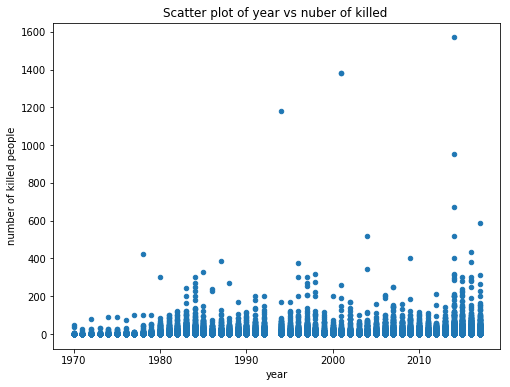

In [75]:
fig = plt.figure(figsize=(8,6))
ax =fig.gca()
mydata.plot(kind='scatter' , x= 'iyear' , y= 'nkill' , ax = ax)
ax.set_title('Scatter plot of year vs nuber of killed ')
ax.set_xlabel('year')
ax.set_ylabel('number of killed people')

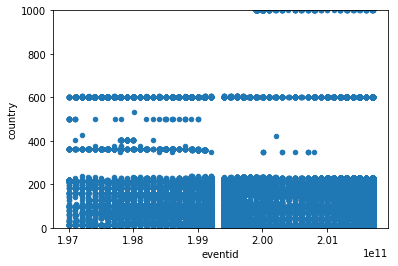

In [76]:
#relationship numerical features (scatter plot)
var = 'eventid'
data = pd.concat([mydata['country'], mydata[var]], axis=1)
data.plot.scatter(x=var, y='country' , ylim=(0,1000))

## Multivaritae Analysis 

(relations between more than 2 varibales)(statistical tools such as one way analysis or rank or to compare the means


(array([1960., 1970., 1980., 1990., 2000., 2010., 2020.]),
 <a list of 7 Text xticklabel objects>)

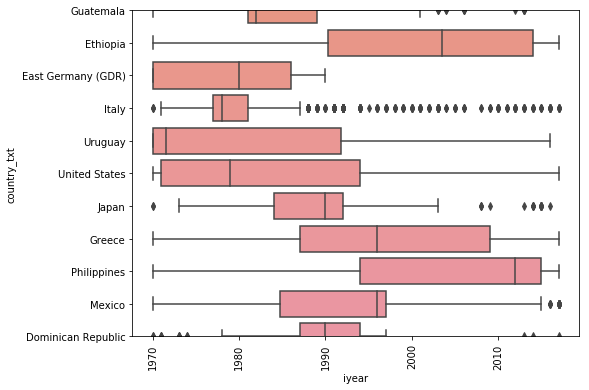

In [77]:
#relationship categorical features and outliers (boxplot)
var = 'iyear'
data = pd.concat([mydata['country_txt'], mydata[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="country_txt", data=data)
fig.axis(ymin=0, ymax=10)
plt.xticks(rotation=90)

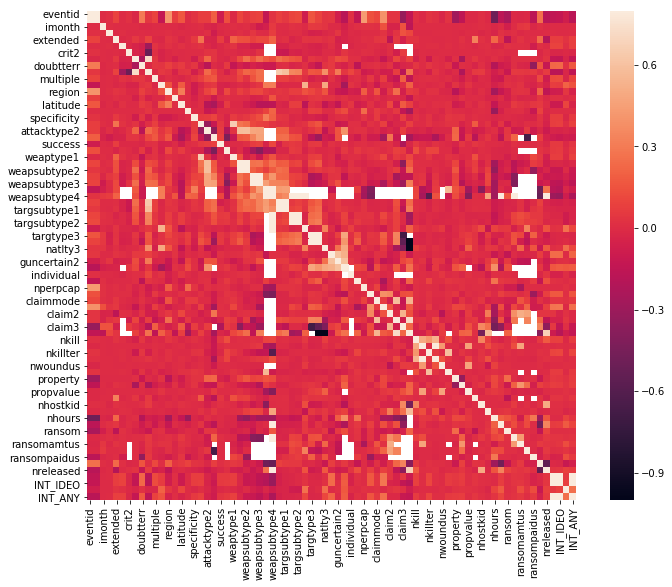

In [78]:
#correlation matrix
corrmat = mydata.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

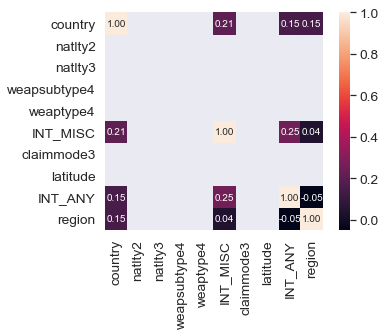

In [79]:
#correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'country')['country'].index
cm = np.corrcoef(mydata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

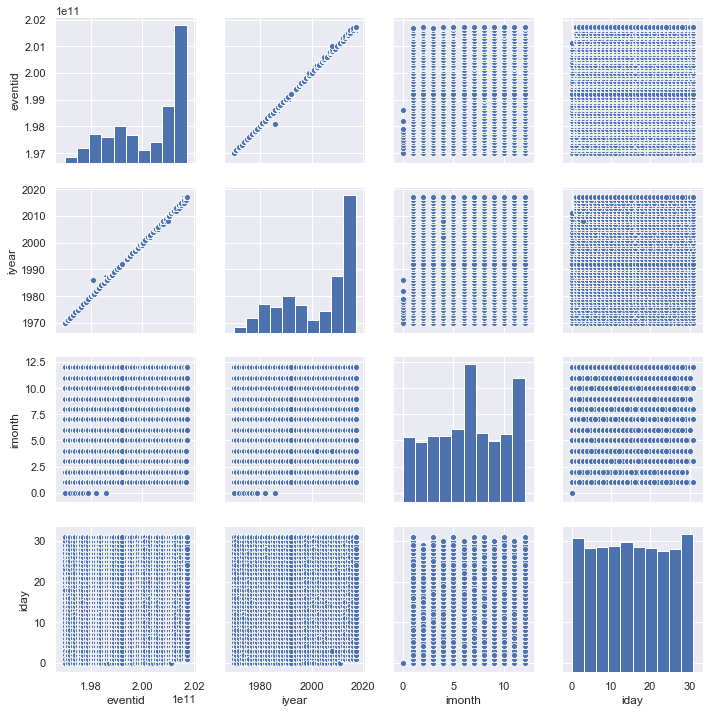

In [89]:
sns.set()
cols = ['eventid', 'iyear', 'imonth', 'iday']
sns.pairplot(mydata[cols], height = 2.5)
plt.show();

## Exploratory Anaysis

Normalizing / scaling
Sub-setting the data (may foucs on one coutry or regin analysis or undersand the weapons used more ofen)
Decision rules , association rules , n grams
Clustring such as K-mean 
Hypotheise analysis (metntal inllness, education, GDP/economic,war status, unemployment ,internet growth / technlogy /telecom tech such as AlThuria phones, healthcare, weather, virtual currrencies such as cryptocoin, presedint of USA periods, UN head periods)
NLP analysis for some text attributes 


Text(0.5, 1.0, 'Terroist attacks with lesser than 100 killed')

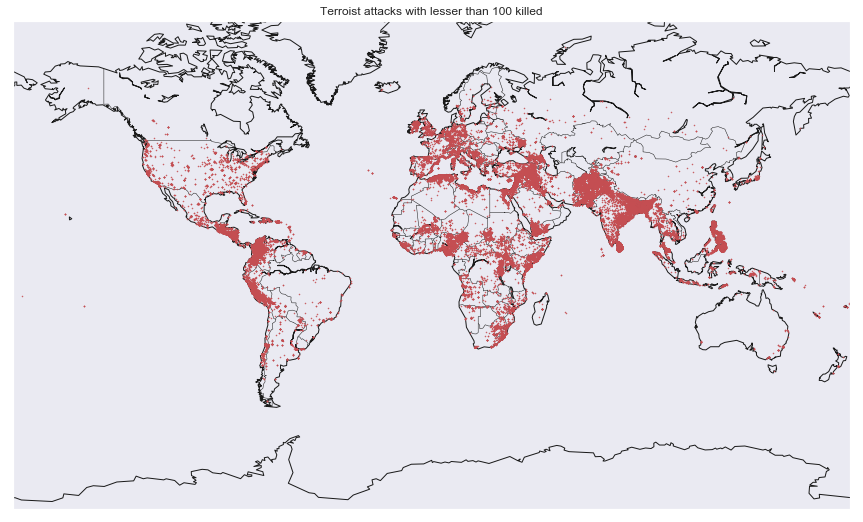

In [81]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nkill'] <100].latitude)
long_100=list(mydata[mydata['nkill']<100].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks with lesser than 100 killed")

Text(0.5, 1.0, 'Terroist attacks with lesser than 100 nwounded')

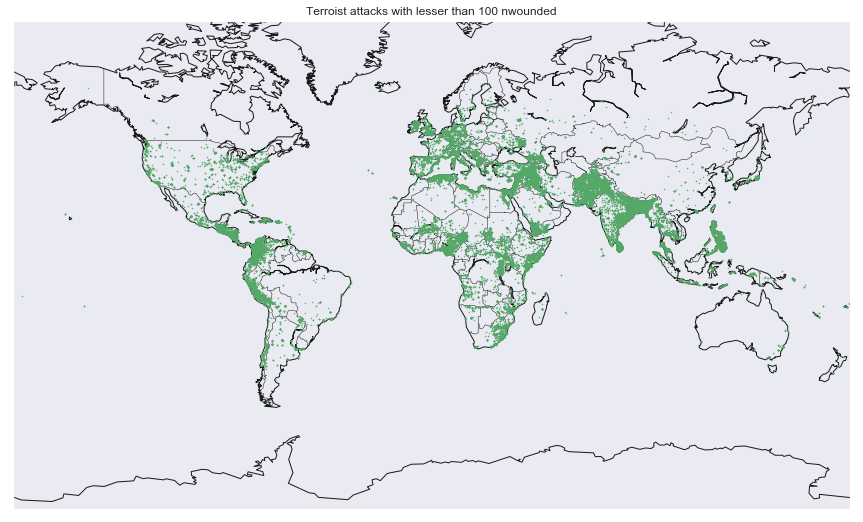

In [82]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(mydata[mydata['nwound'] <100].latitude)
long_100=list(mydata[mydata['nwound']<100].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'g')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title("Terroist attacks with lesser than 100 nwounded")

In [83]:
#col = mydata.columns
#j=0
#for i in col:
 #   print (col[j])
  #  j=j+1

In [84]:
#NLP
motive = mydata['motive']
motive.dropna(inplace=True)
motive

5            To protest the Cairo Illinois Police Deparment
8               To protest the War in Vietnam and the draft
9               To protest the War in Vietnam and the draft
11                        Protest the draft and Vietnam War
14        To protest United States owned businesses in P...
17        Suspected motives were to protest the Vietnam ...
19        Retaliation for the store owner who shot and k...
22        The incident took place during disturbances be...
23        The incident took place during heightened anti...
24                      Intimidate the Black Panther Party.
28        The attack occurred during the violent Iowa Be...
29        The motive of the attack was to prevent the Af...
30                                           To kill police
31        African American opposition to the school inte...
32                                           To kill police
33                           Protest and sabotage the draft
36        The attack occurred during the

In [85]:
#NLP
motive_words=''
for i in range(50560):
    reason=re.sub('[^a-zA-z]',' ',motive.iloc[i])
    reason=reason.lower()
    reason=reason.split()
    remove=['specific','motive','unknown', 'nknown','un','known','attack','source',
            'sources','responsibility','claimed','incident','carried','stated','larger', 'trend','part']
    reason=[word for word in reason if word not in remove]
    reason=[word for word in reason if word not in set(stopwords.words('english'))]
    for word in reason:
        motive_words = motive_words+word+' '

In [86]:
motive_wordcloud=WordCloud(width=1200,height=720,random_state=101).generate(motive_words)

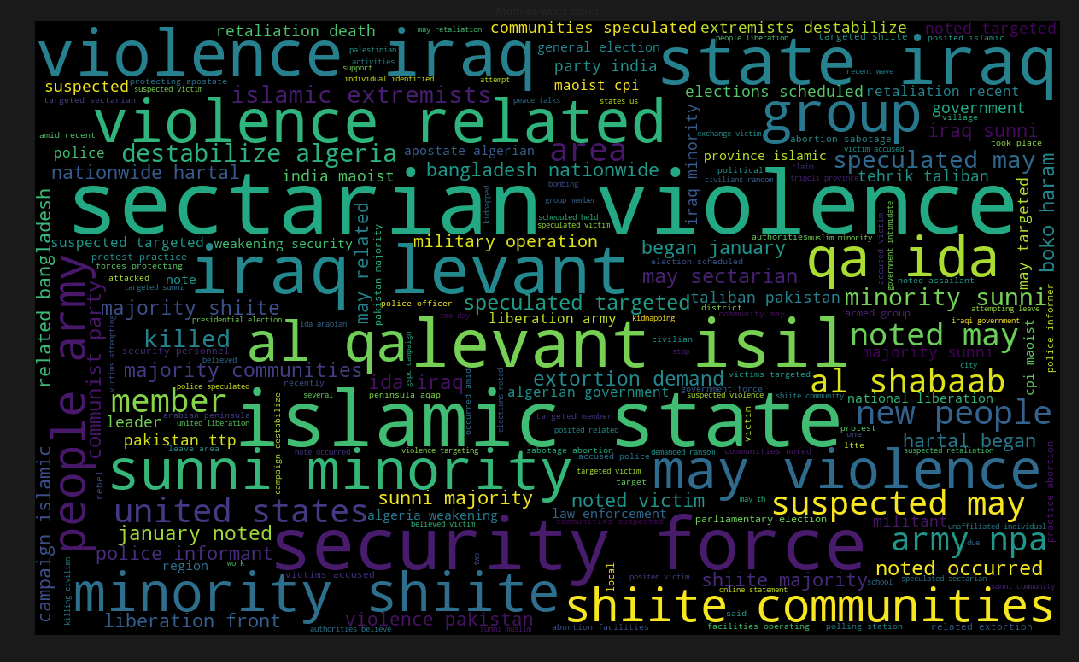

In [87]:
plt.figure(facecolor='k',figsize=(16,9))
plt.imshow(motive_wordcloud)
plt.axis('off')
plt.title('Motives word cloud')
plt.tight_layout(pad=0)
plt.show()

## Dimensionality Reduction

remove attributs with too many missing values
remove attributis with zero or very low varince
remove one of the attribits with high correlations with other - prefer the one with more missing values or lower varince
Feature selection(decide on the importance of the attribute using statstical measures like information gain or Geni index) (Forward selection and backward elemination) 
Feature extraction (reduce dimonins by transformation PCA princibal complnet anaylsis or Linear dircrminate analysis)


##### Remove low or No Varince
since crit1, crit2, crit3 and doubtterr is set to one value after filtering i.e varince = 0 for all of them we can elminate the attributes since no value added and no future use 

In [42]:
mydata['crit1'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [43]:
mydata['crit2'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit2, dtype: float64

In [44]:
mydata['crit3'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit3, dtype: float64

In [45]:
mydata['crit1'].describe()

count    138879.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: crit1, dtype: float64

In [47]:
mydata['doubtterr'].describe()

count    138879.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: doubtterr, dtype: float64

In [50]:
list1 = ['crit1' , 'crit2' , 'crit3' , 'doubtterr']

In [51]:
mydata.shape

(138879, 66)

In [52]:
mydata = mydata.drop(list1,axis=1)

In [53]:
mydata.shape

(138879, 62)

In [54]:
mydata

,eventid,iyear,imonth,iday,extended,summary,multiple,country,country_txt,region,...,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,scite1,scite2,scite3,dbsource
0,1.970000e+11,1970,7,2,0,NaN,0.0,58,Dominican Republic,2,...,0.0,0.0,0,0,0,0,NaN,NaN,NaN,PGIS
1,1.970000e+11,1970,0,0,0,NaN,0.0,130,Mexico,1,...,1.0,1.0,0,1,1,1,NaN,NaN,NaN,PGIS
2,1.970010e+11,1970,1,0,0,NaN,0.0,160,Philippines,5,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
3,1.970010e+11,1970,1,0,0,NaN,0.0,78,Greece,8,...,0.0,0.0,-9,-9,1,1,NaN,NaN,NaN,PGIS
5,1.970010e+11,1970,1,1,0,1/1/1970: Unknown African American assailants ...,0.0,217,United States,1,...,0.0,0.0,-9,-9,0,-9,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project
6,1.970010e+11,1970,1,2,0,NaN,0.0,218,Uruguay,3,...,0.0,0.0,0,0,0,0,NaN,NaN,NaN,PGIS
8,1.970010e+11,1970,1,2,0,"1/2/1970: Karl Armstrong, a member of the New ...",0.0,217,United States,1,...,0.0,0.0,0,0,0,0,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project
9,1.970010e+11,1970,1,3,0,"1/3/1970: Karl Armstrong, a member of the New ...",0.0,217,United States,1,...,0.0,0.0,0,0,0,0,Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project
13,1.970010e+11,1970,1,9,0,1/9/1970: Unknown perpetrators set off a fireb...,0.0,217,United States,1,...,0.0,0.0,-9,-9,0,-9,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project
15,1.970010e+11,1970,1,10,0,NaN,0.0,499,East Germany (GDR),9,...,0.0,0.0,0,1,1,1,NaN,NaN,NaN,PGIS


In [10]:
#list1 =100*mydata.isnull().sum()/mydata.shape[0]
#list1.sort_values(ascending=False)

In [ ]:
#len(mylist)

In [ ]:
#mylist

In [ ]:
#mydata = mydata.drop(mylist,axis=1)

In [ ]:
#list1 =100*mydata.isnull().sum()/mydata.shape[0]
#list1.sort_values(ascending=False)

In [ ]:
#for i in mydata.columns:
 #   print(mydata[i].describe())
  #  print('')
   # print('-------------------------------')
    #print('')

## Experimental Desgin

Randamizing, Splitting the data into training and test sets (tranditional or Concept drift in case of time involved)
Treatment for imblance (undersampling the majority class and oversampling the minority class)
Cross validation such as 10 flods 
Bootstrapping resmapling


## Modeling

Classification vs regression
linearity vs non linearty 
for classifier and adat are linear (SVM(linear kernel) , linear logistic regression , Naivebase)
for calssifier and data are nonlinear (SVM(nonlinear kernel) , deceision tree ,random forest, KNN  )
Measure (distance measures: Eculaidne or Manhatan , Similarty meausre: Cosine similarity)


## Evaluation

Regression problem (R squared , goodness of fit , AIC (Akaike information criterion) , RMSE (root mean square error)
Classification (Confucion matric , ROC (receiver opecrating charchritices) , Accurracy , Recall , Prescision)
compare performnce between diffrent models (contingency tables , multivariate analysis of variance)


## Improving the Model

deal with very high accuracy(Fixation varibales , overfitting)
deal with very low performance (many need new variables or more obervations)
itterate to improve the model performance 


## Conclusions

Infrences , dissucsuions
Threates to validity (Internal , External , construct) and propose the soultion that may mitigate these threates
Next/ future steps
